In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
warnings.filterwarnings('ignore')


# Part 1: Data Exploration and Visualization (20 marks)

## Q1 loading

In [9]:
df = pd.read_csv('lifesat.csv');
df.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


## Q2 

In [14]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               27 non-null     object 
 1   GDP per capita (USD)  27 non-null     float64
 2   Life satisfaction     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 780.0+ bytes
None
       GDP per capita (USD)  Life satisfaction
count             27.000000          27.000000
mean           41564.521771           6.566667
std             9631.452319           0.765607
min            26456.387938           5.400000
25%            33938.289305           5.900000
50%            41627.129269           6.800000
75%            49690.580269           7.300000
max            60235.728492           7.600000


## Q3


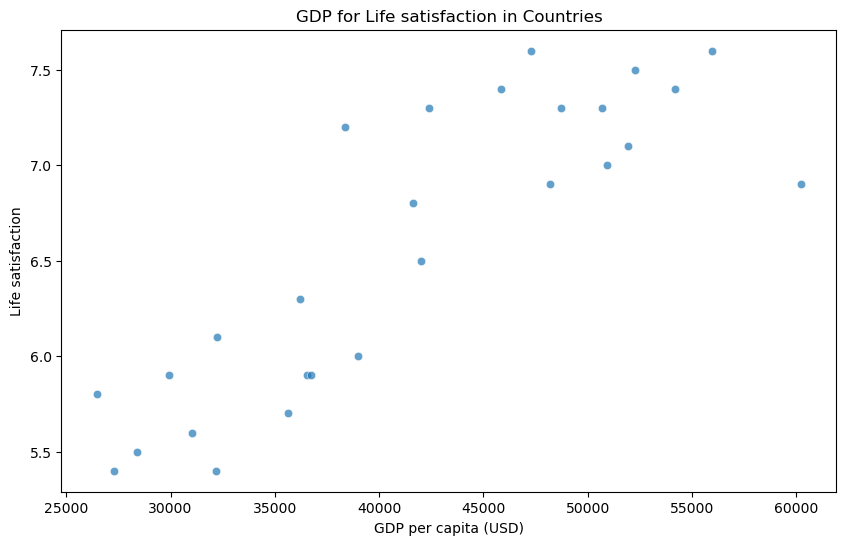

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x="GDP per capita (USD)", y="Life satisfaction", alpha=0.7).set_title('GDP for Life satisfaction in Countries')
plt.show()


There is a positive correlation

# Part 2: Linear Regression Model (30 marks)

## Q4

In [29]:
X = df[['GDP per capita (USD)']]
y = df[['Life satisfaction']]
print(X.shape, y.shape, sep='\n')

(27, 1)
(27, 1)


## Q5

In [46]:
lr = LinearRegression().fit(X, y)
print("Coefficient: ", lr.coef_[0])
print("Intercept: ", lr.intercept_)

Coefficient:  [6.77889969e-05]
Intercept:  [3.74904943]


## Q6

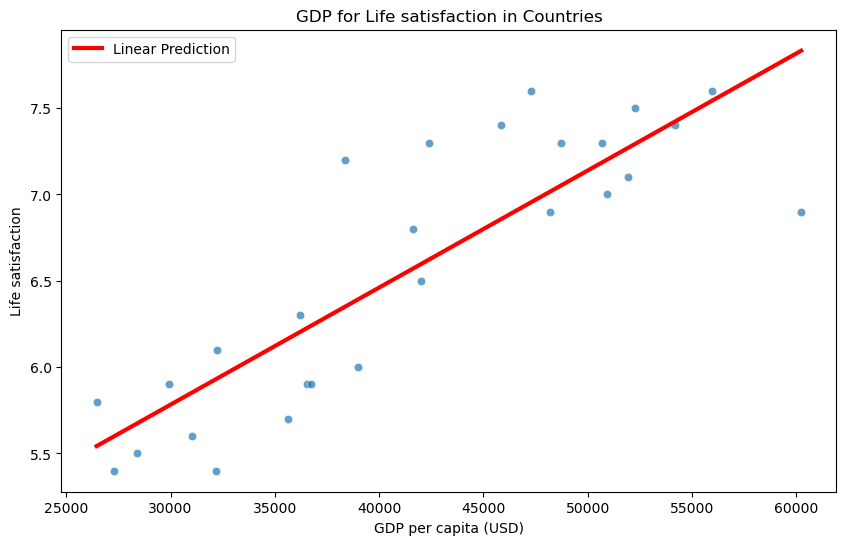

In [52]:
plt.figure(figsize=(10, 6))
# plt.scatter(X, y, color='blue', label='Data')
sns.scatterplot(df, x="GDP per capita (USD)", y="Life satisfaction", alpha=0.7).set_title('GDP for Life satisfaction in Countries')
plt.plot(X, lr.predict(X), color='red', linewidth=3, label='Linear Prediction')
plt.legend()
plt.show()

## Q7

In [75]:
prediction_lr = lr.predict([[37655.2]])
print(prediction_lr[0]) 

[6.30165767]


# Part 3: K-Nearest Neighbors Regression (25 marks)

In [59]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X, y)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## Q9

In [67]:
prediction_knn = knn.predict([[37655.2]])
prediction_lr = lr.predict([[37655.2]])
print(prediction_knn[0], prediction_lr[0], sep='\n')

[6.33333333]
[6.30165767]


## Q10

[array([7.2]), array([6.33333333]), array([6.26]), array([6.37])]


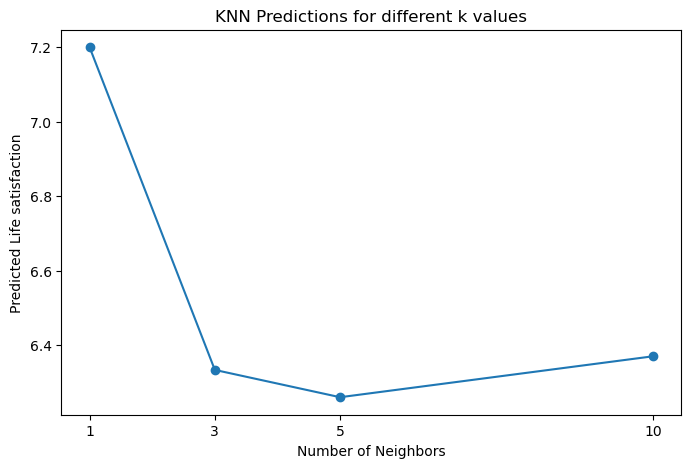

In [77]:
ks = [1, 3, 5, 10]
ans = []
for k in ks:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X, y)
    pred = model.predict([[37655.2]])[0]
    ans.append(pred)

print(ans)
plt.figure(figsize=(8, 5))
plt.plot(ks, ans, marker='o', linestyle='-')
plt.title("KNN Predictions for different k values")
plt.xlabel("Number of Neighbors")
plt.ylabel("Predicted Life satisfaction")
plt.xticks(ks) 
plt.show()